In [333]:
# importing some packages - may require installing them with anaconda or pip if you don't have them in your environment already
import numpy as np  # numerical tools
import matplotlib.pyplot as plt  # plotting tools
import pandas as pd  # handy for treating data as one big table, think an excel spread sheet
import geopandas as gpd  # pandas for geospatial data
from shapely.geometry import Point  # for creating point geometries from shapefiles
import seaborn as sns  # for making density plots


# useful packages for downloading and unzipping shapefiles from online domains, don't require installation
import os  # for file path operations
import zipfile  # for unzipping files
import tempfile  # for creating temporary directories
import requests  # for downloading files from the internet

### A few starting notes

Notice that in each of the cells we will:
1. Load a data file (csv file, GIS shapefile,...)
2. Read and prepare the data from that file
3. Plot the data 


**Data**

In each of the sections, we will begin by loading a geologic dataset to plot. I have compiled these sample datasets for you and they're downloadable from Canvas. Some of them, we will learn to load directly from the web. At the bottom of the page you will find the references for each dataset, including direct web links so you can download additional data if you're interested! 


# Standard plots

## Line plot
Probably the most common type of plot? Plotting continuous variables against each other. 

In [334]:
# let's load and plot some data showing some of the orbital parameters that set the Milankovitch cycles and some ice core temperature records.

# let's begin by reading the data
Milankovitch_insolation = pd.read_csv(
    "data_for_plots/Milankovitch-Insolation.csv", header=None
)  # insolation data
ice_core_temp = pd.read_csv(
    "data_for_plots/orbital time-tpt-inc.csv"
)  # ice core temperature data

#### CLEANING UP THE FILE BEFORE PLOTTING

# let's take a look at the first few rows of the insolation data to see the formatting and if we need to omit any rows before plotting
Milankovitch_insolation.head()  # print first 5 rows of the insolation data

# lots of info on top of the script... let's omit the first 4 rows so we just get the data
Milankovitch_insolation = Milankovitch_insolation.iloc[
    5:
]  # omit the first few rows that don't contain data
Milankovitch_insolation.head()  # print first 5 rows of the insolation data

# ok... but we still need to assign the column header names
Milankovitch_insolation.columns = [
    "Year (BP)",
    "Months",
    "7 to 7",
    "Annual 65N",
    "Annual global",
    "BP",
    "Global cos-weighted",
]  # assign the column header names

# convert columns to numeric types so we can plot them
Milankovitch_insolation = Milankovitch_insolation.apply(pd.to_numeric, errors="coerce")
Milankovitch_insolation.head()  # print first 5 rows of the insolation data

# now let's load the ice core temperature data (I won't show every cleaning step here, you can look at the lines above and follow what I did for the insolation if you want to do it step by step)
ice_core_temp = ice_core_temp.iloc[4:]  # omit the rows without data
# remove second col of nans
ice_core_temp = ice_core_temp.drop(ice_core_temp.columns[1], axis=1)
ice_core_temp.columns = [
    "Year (BP)",
    "Temperature (C)",
]  # assign the column header names

# convert columns to numeric types so we can plot them
ice_core_temp = ice_core_temp.apply(pd.to_numeric, errors="coerce")
ice_core_temp.head()  # print first 5 rows of the ice core temperature data

,Year (BP),Temperature (C)
4,-250000,427.883
5,-249900,428.157
6,-249800,428.441
7,-249700,428.725
8,-249600,429.009


<Figure size 1920x1440 with 0 Axes>

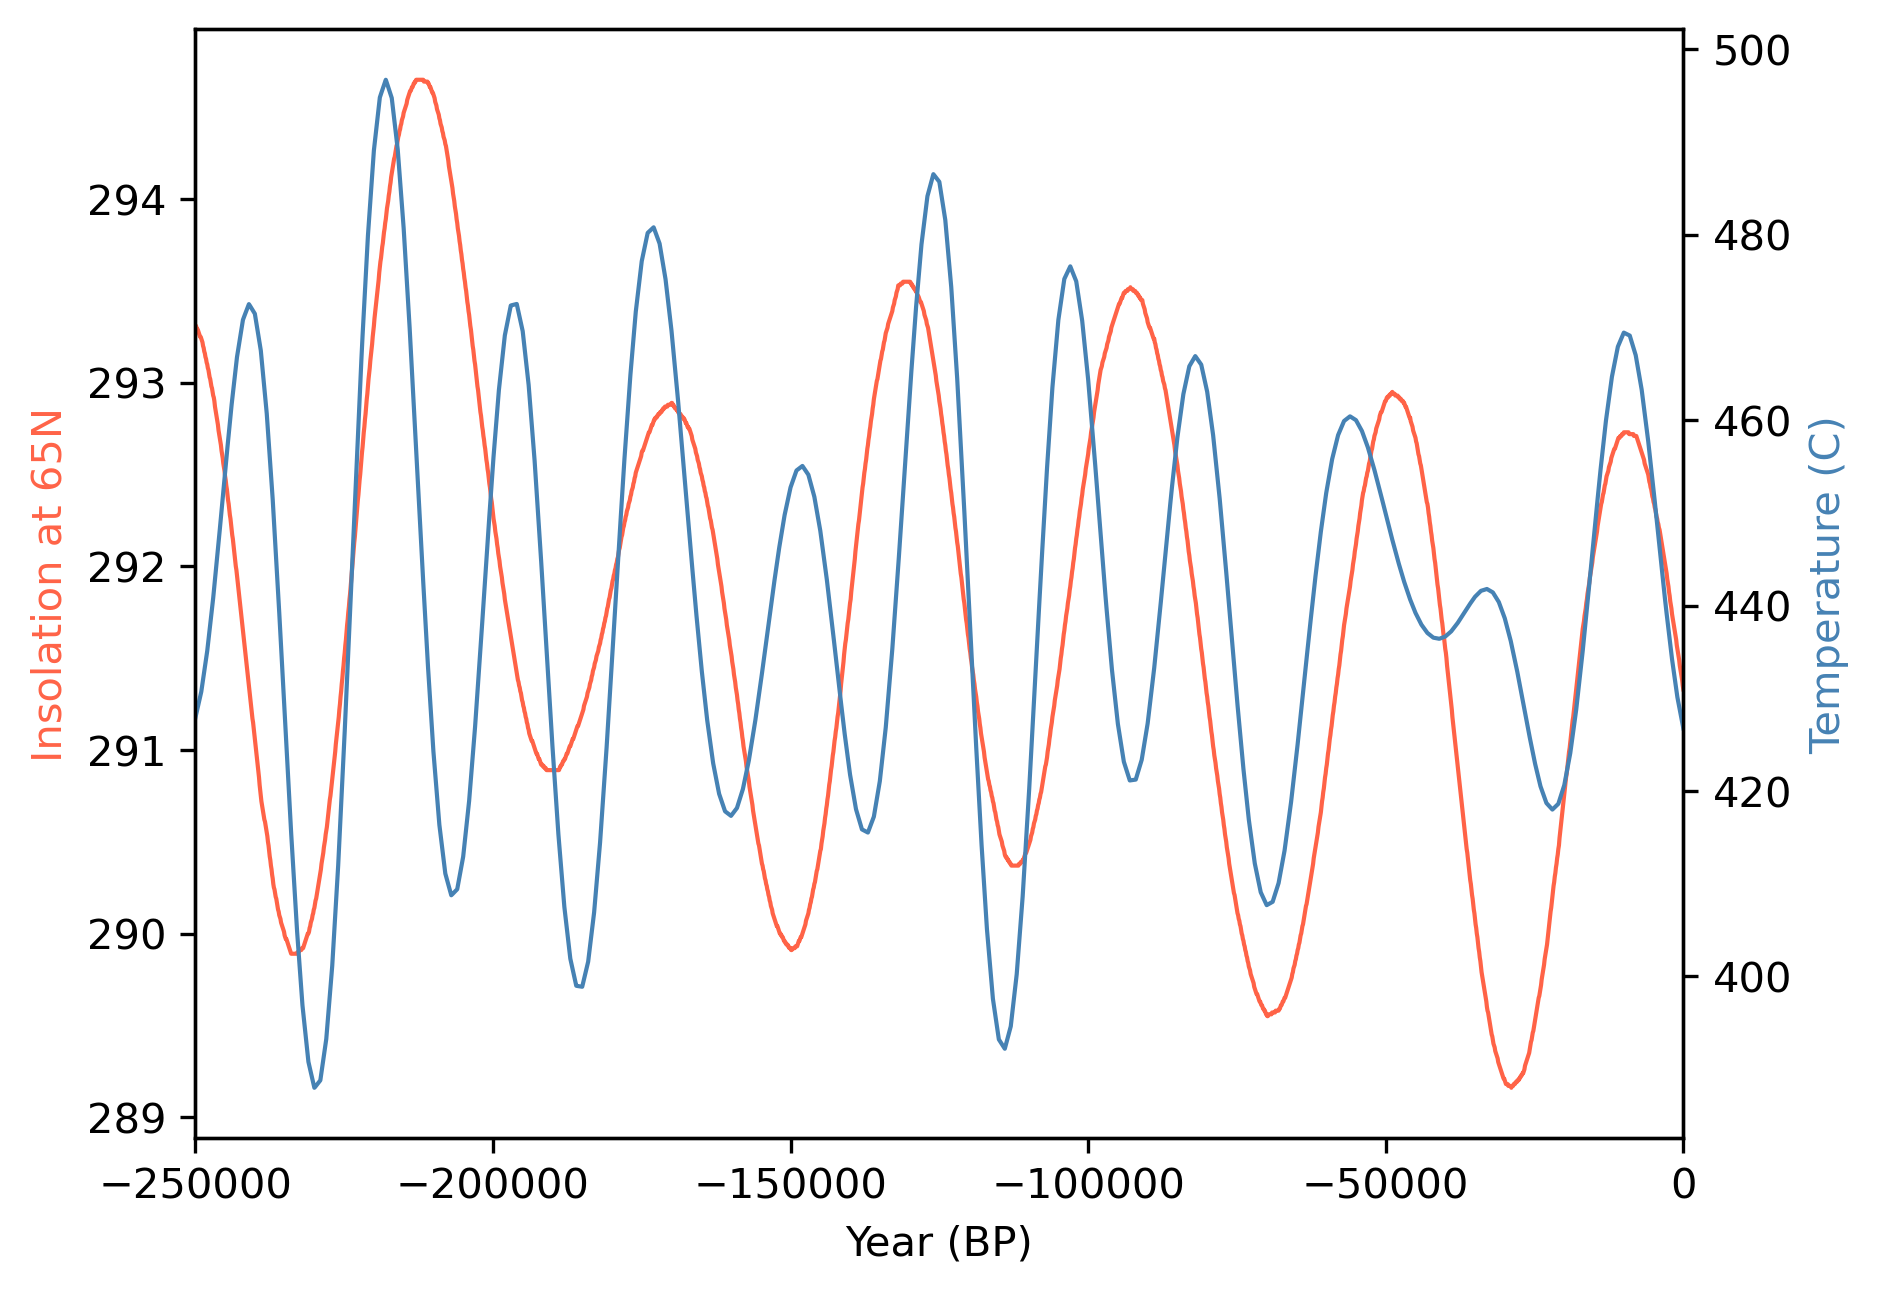

In [335]:
# time to plot! 

plt.figure(dpi=300)
# we'll need to use separate y axes for each plot, since they have different scales (try plotting them on the same axis to see what I mean!)
fig, ax1 = plt.subplots(dpi=300)
ax1.plot(
    Milankovitch_insolation["Year (BP)"],
    Milankovitch_insolation["Annual 65N"],
    label="65N insolation",
    linewidth=1,
    c="tomato",
)
ax2 = ax1.twinx()  # make twin y axis for the ice core temperature data
ax2.plot(
    ice_core_temp["Year (BP)"],
    ice_core_temp["Temperature (C)"],
    label="Temperature",
    lw=1,
    c="steelblue",
)  # note how I used the command lw for linewidth, both work!
ax2.set_xlim(-250000, 0)

ax2.set_ylabel(
    "Temperature (C)", c="steelblue"
)  # note how I used the command c to change the color of the y axis label to match the color of the line!
ax1.set_ylabel("Insolation at 65N", c="tomato")
ax1.set_xlabel("Year (BP)")
ax1.set_xlim(-250000, 0)

# notice I don't need a legend because the lines are already color-coded!
plt.show()  # plot is ready to go!
# plt.savefig('milankovitch_insolation_temperature.png',bbox_inches='tight') # option to save, can change png to pdf or any other format

## Scatter plot
Scatter plots plot a dependent versus an independent variable and let us understand correlations between them

In [336]:
# Let's look at the number of fractures created by the 2014 Balochistan earthquake in Pakistan, and its relationship to the location of the fault
Balochistan_fracture_density = pd.read_csv(
    "data_for_plots/Balochistan_density_distribution.txt", sep="\t"
)  # sep='\t' is used to specify that the delimiter is a tab, so pandas can properly read the different columns, try removing it and running the print line underneath to see!
Balochistan_fracture_density.head()

,Fault-perpendicular distance (m),Fracture density
0,1.043269,0.097014
1,1.133552,0.093126
2,1.231648,0.095049
3,1.338233,0.097768
4,1.454041,0.100188


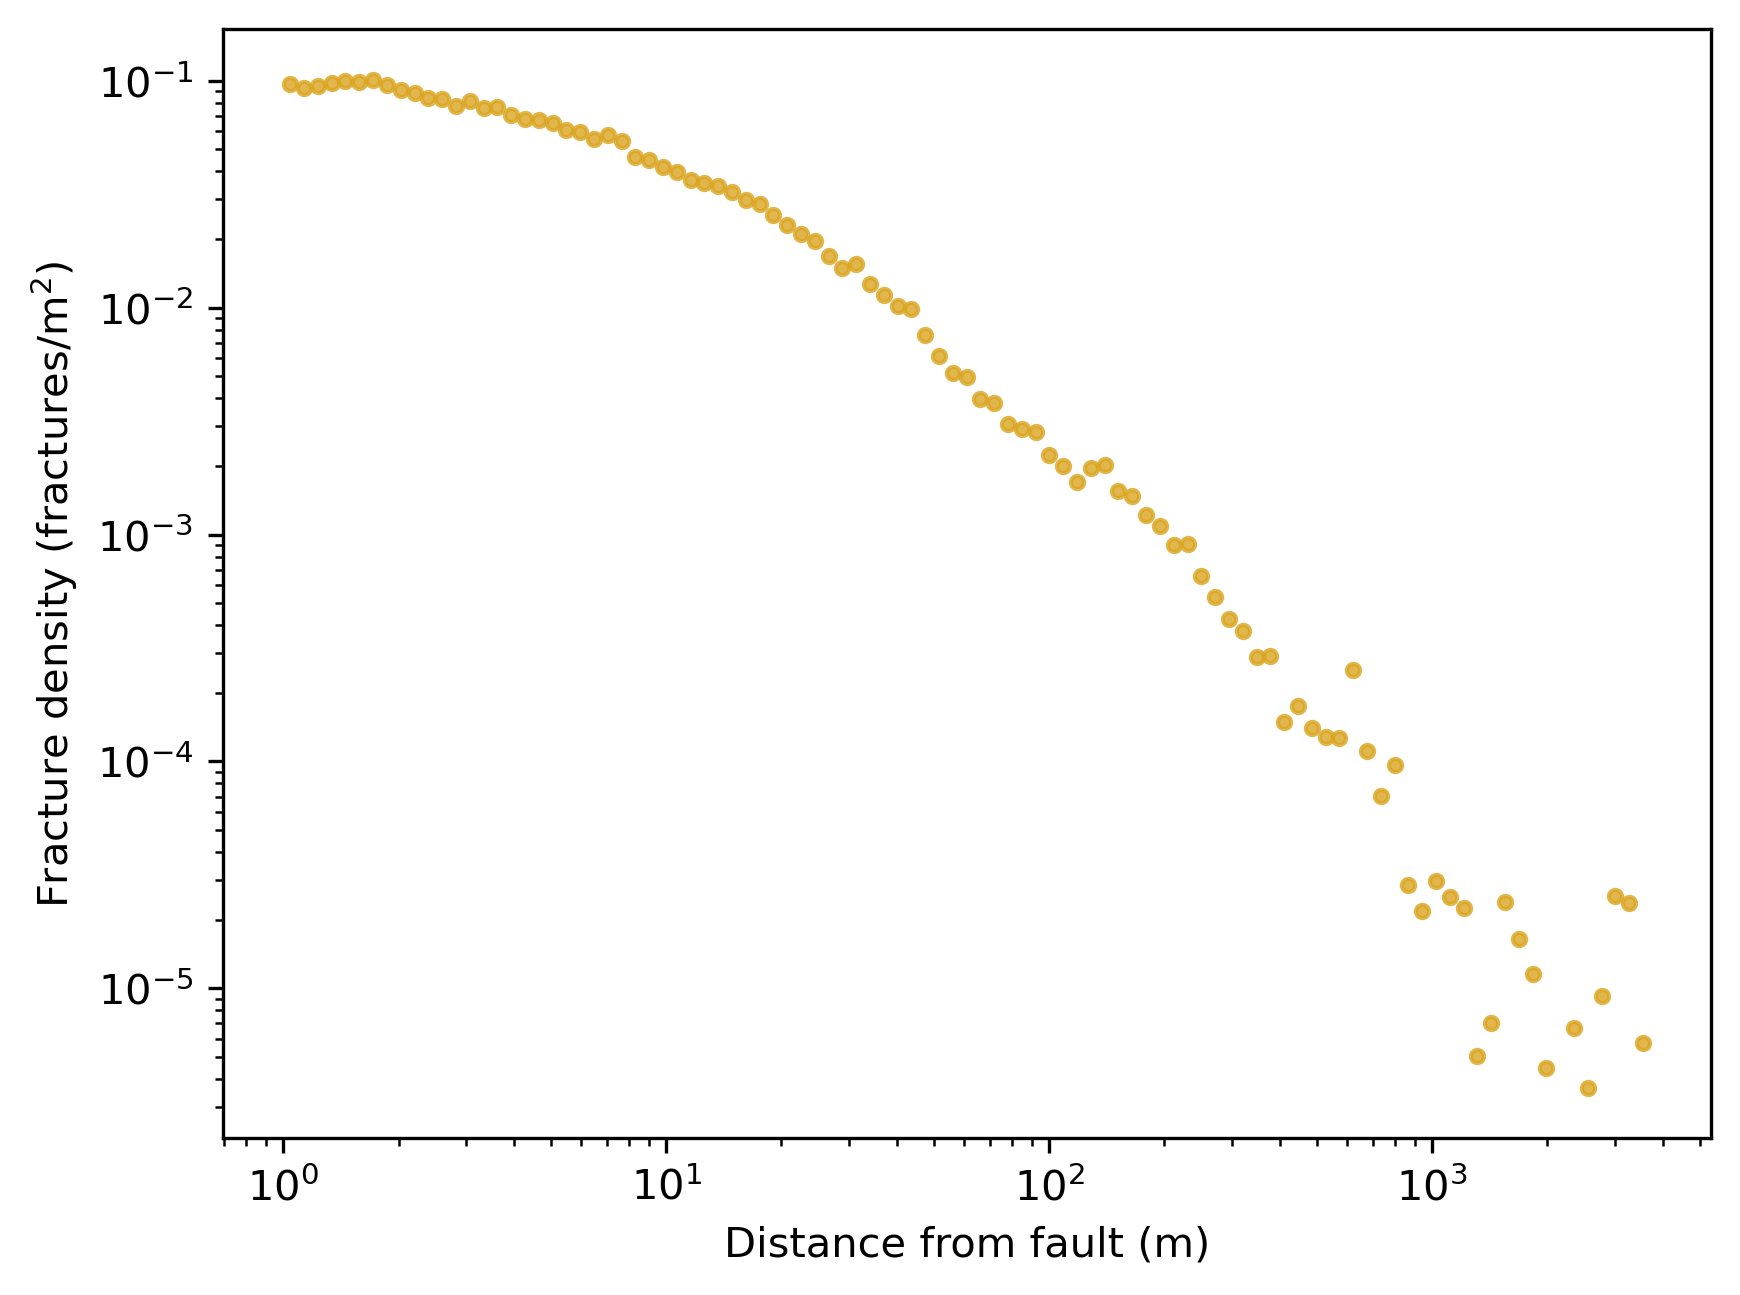

In [337]:
# let's plot the spatial distribution of the fracture density! 

plt.figure(dpi=300)
plt.scatter(
    Balochistan_fracture_density["Fault-perpendicular distance (m)"],
    Balochistan_fracture_density["Fracture density"],
    c="goldenrod",
    s=10,
    alpha=0.8,
)
plt.xlabel("Distance from fault (m)")
plt.ylabel(r"Fracture density (fractures/m$^{2}$)")
plt.yscale("log")
plt.xscale("log")
plt.show()

## Histogram
Histograms show the frequency of different values, grouped into data intervals called bins, within a dataset

In [338]:
# let's load and plot the magnitudes of all earthquakes in the world in the last month
eq_catalog = pd.read_csv("data_for_plots/global_catalog_last_month.csv")
eq_catalog.head()  # visualize the first few rows of the data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2026-02-03T01:46:14.842Z,61.336000,-146.714000,22.600,2.70,ml,31,44,0.30000,0.60,...,2026-02-03T01:47:40.000Z,"30 km NW of Valdez, Alaska",earthquake,2.90,2.5542,0.200,4,automatic,ak,ak
1,2026-02-03T01:39:29.207Z,63.460000,-150.943000,2.400,2.80,ml,42,40,0.60000,1.00,...,2026-02-03T02:00:18.040Z,"39 km ESE of Denali National Park, Alaska",earthquake,2.50,2.0042,0.200,4,automatic,ak,ak
2,2026-02-03T01:24:35.490Z,37.747501,-121.941666,8.240,2.64,md,53,36,0.09814,0.09,...,2026-02-03T02:02:07.180Z,"5 km SE of San Ramon, CA",earthquake,0.13,0.3800,0.110,58,automatic,nc,nc
3,2026-02-03T00:33:23.258Z,56.171200,161.644100,72.245,5.00,mb,67,58,3.60300,0.58,...,2026-02-03T01:40:24.040Z,"52 km W of Ust’-Kamchatsk Staryy, Russia",earthquake,10.62,6.2850,0.028,414,reviewed,us,us
4,2026-02-03T00:27:39.395Z,59.666000,-152.920000,100.100,3.30,ml,107,83,0.30000,0.80,...,2026-02-03T01:31:21.040Z,"62 km WSW of Anchor Point, Alaska",earthquake,3.30,1.5727,0.300,13,automatic,ak,ak


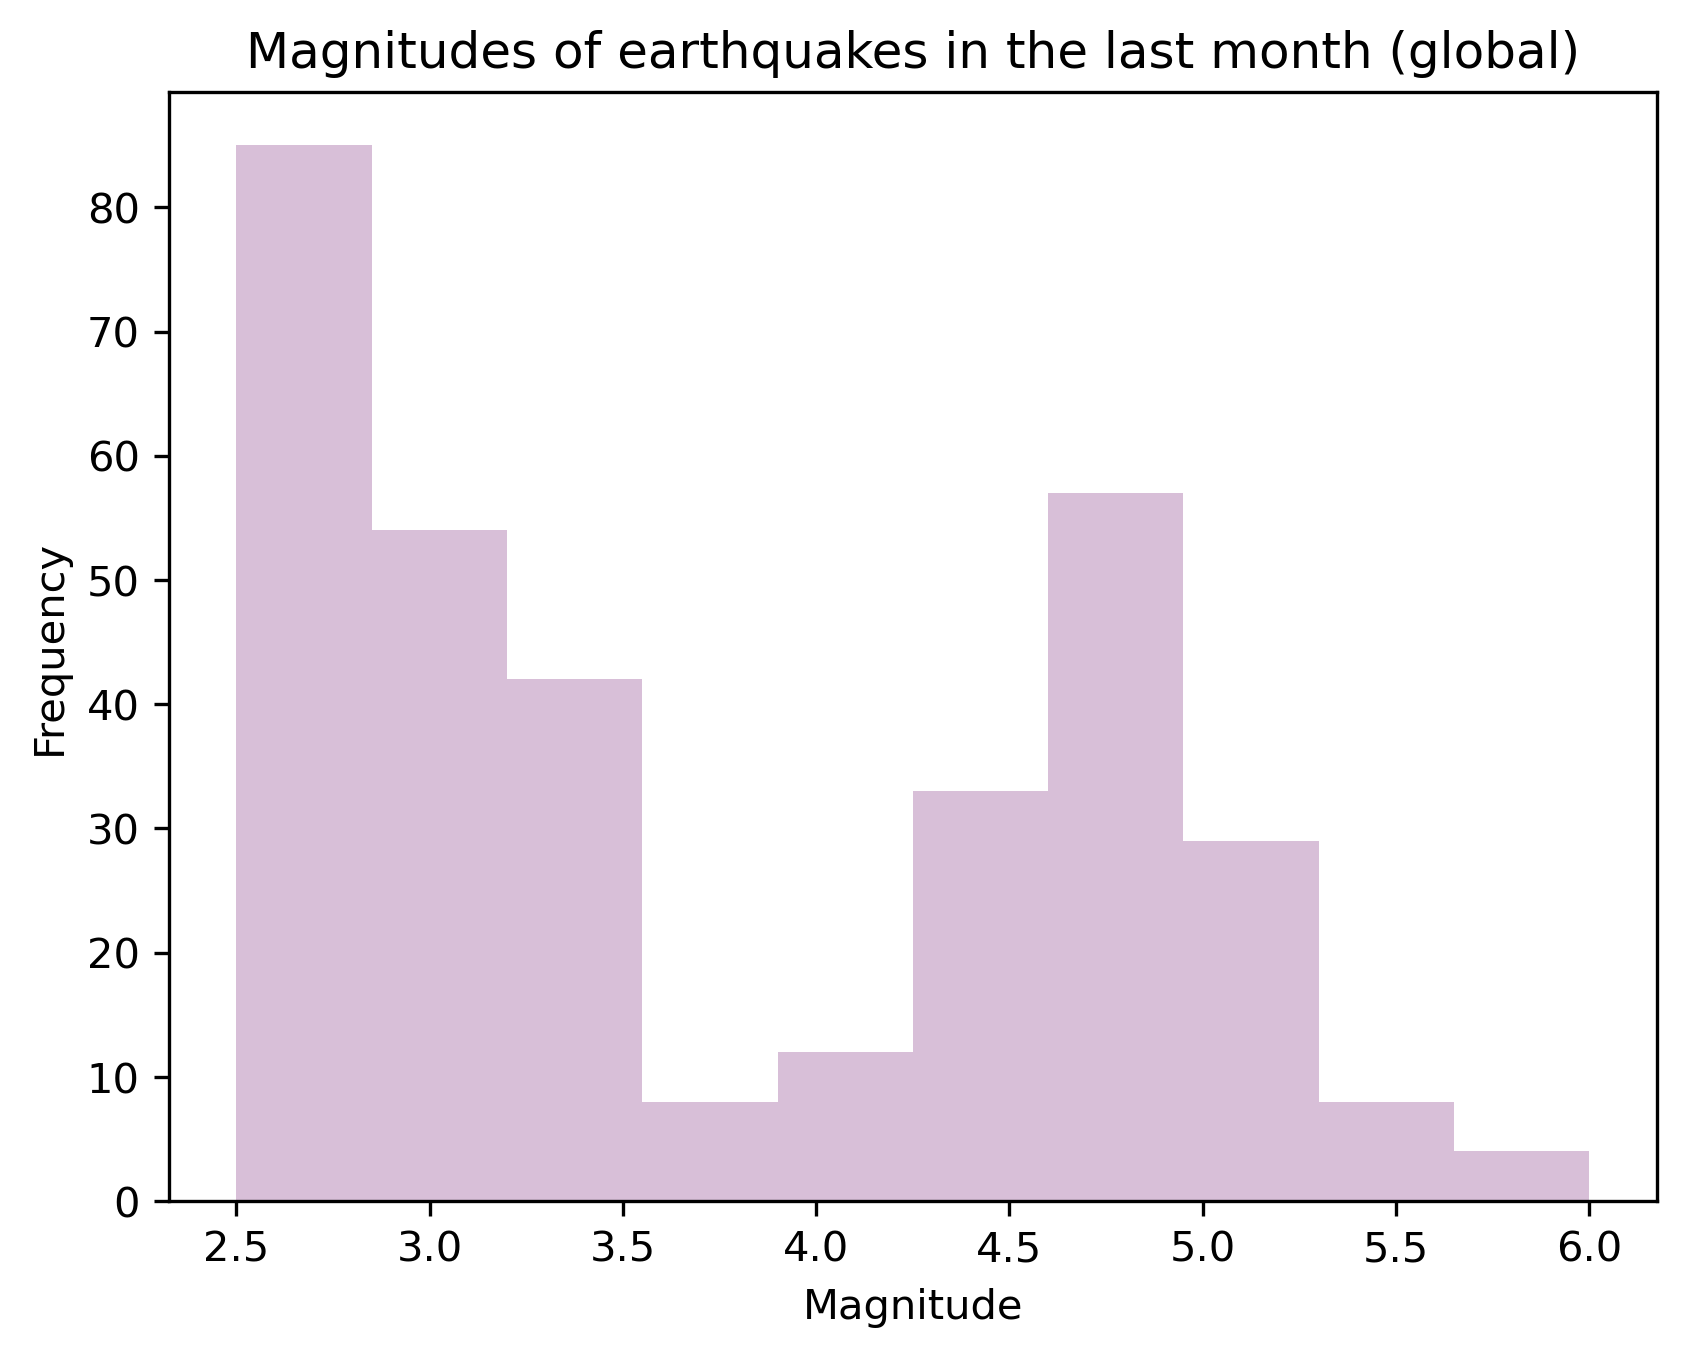

In [339]:
# let's plot the histogram of the magnitudes
plt.figure(dpi=300)
plt.hist(
    eq_catalog["mag"], color="thistle"
)  # plot the histogram of the magnitudes, with 20 bins
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title(
    "Magnitudes of earthquakes in the last month (global)"
)  # let's add a title this time
plt.show()

# Geo plots

Now, we will make some plots that are very typical in the geosciences and may be less so in other fields. 

## Maps
Maps are one of the most useful visualization tools in the geosciences. Let's make a map of Utah and plot the locations of active faults and the Colorado river.

In [340]:
# let's begin by reading in the fault shapefiles (the line locations of all faults in the US, which we will filter for Utah)
faults = gpd.read_file(
    "data_for_plots/Qfaults_US_Database.shp"
)  # read the fault shapefile, a file format that stores the location of faults, as well as some coordinate system information

# let's now use a public dataset to load the location of large rivers in the US
ne_rivers_url = (
    "https://naciscdn.org/naturalearth/50m/physical/ne_50m_rivers_lake_centerlines.zip"
)
rivers_temp_dir = tempfile.mkdtemp()
rivers_zip_path = os.path.join(
    rivers_temp_dir, "ne_rivers.zip"
)  # we make a temporary directory to store the zip file with the river locations
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"
}  # we need to add a header to the request to avoid being blocked by the server
response_rivers = requests.get(
    ne_rivers_url, headers=headers, stream=True
)  # we download the zip file
response_rivers.raise_for_status()  # check that the download was successful
with open(rivers_zip_path, "wb") as f:
    for chunk in response_rivers.iter_content(chunk_size=8192):
        f.write(chunk)
with zipfile.ZipFile(rivers_zip_path, "r") as zip_ref:
    zip_ref.extractall(rivers_temp_dir)
rivers_shp_file = [f for f in os.listdir(rivers_temp_dir) if f.endswith(".shp")][
    0
]  # now find the rivers shapefile from the temporary directory
rivers = gpd.read_file(
    os.path.join(rivers_temp_dir, rivers_shp_file)
)  # read the rivers shapefile

# let's do the same exercise for state boundaries, so we can plot the location of Utah
# Download Natural Earth 110m admin level 1 (states/provinces) boundaries
ne_states_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces.zip"
temp_dir = tempfile.mkdtemp()
zip_path = os.path.join(temp_dir, "ne_states.zip")
response = requests.get(
    ne_states_url, headers=headers, stream=True
)  # note we're using the same header we already defined when getting the rivers shapefile
response.raise_for_status()
with open(zip_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(temp_dir)
states_shp_file = [f for f in os.listdir(temp_dir) if f.endswith(".shp")][0]
states = gpd.read_file(os.path.join(temp_dir, states_shp_file))

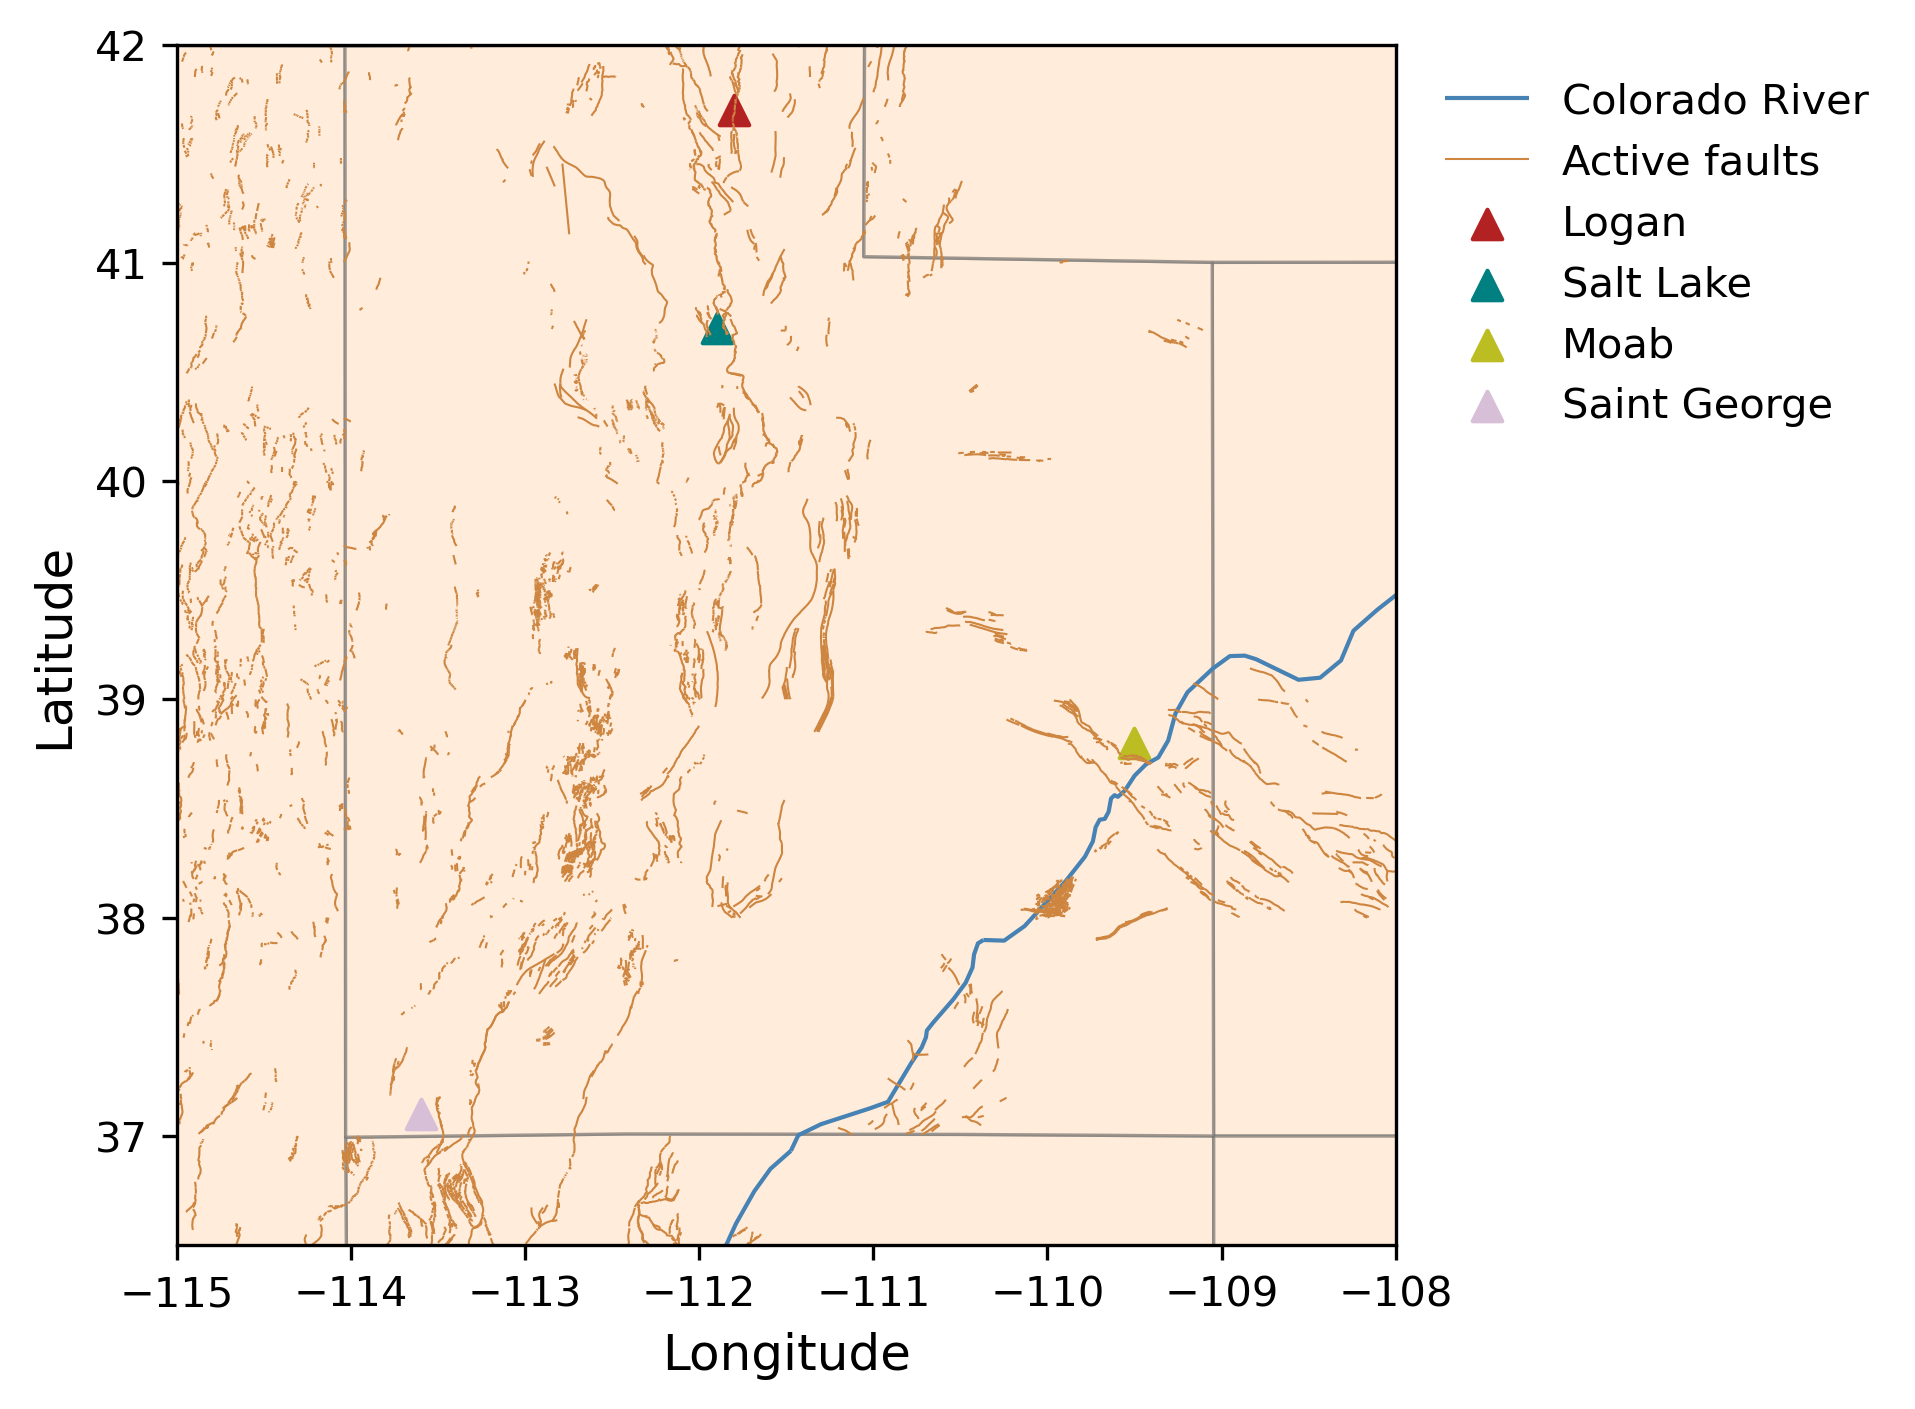

In [341]:
# we're finally ready to plot!
# let's begin by plotting the state boundaries
fig = plt.figure(
    dpi=300
)  # I'm making a high resolution figure, dpi=300, which is acceptable for printing and adding to presentations
ax = fig.add_subplot(
    111
)  # let's add a single axis to the figure to plot all data together

# without this cropping step, the figure would show the entire United States, global large rivers, and all faults in the US.
ax.set_xlim(
    -115.0, -108.0
)  # Utah center approximately: -111.5 longitude, 39.5 latitude
ax.set_ylim(36.5, 42)

# plotting time!
states.plot(
    ax=ax, edgecolor="dimgray", facecolor="peachpuff", linewidth=0.8, alpha=0.5
)  # let's plot the state boundaries in gray, with the state backgrounds in light orange
rivers.plot(
    ax=ax, color="steelblue", linewidth=1, label="Colorado River"
)  # let's plot the rivers in a nice blue color
faults.plot(
    ax=ax, color="peru", linewidth=0.5, label="Active faults"
)  # let's plot the faults in brown

# Add labels and legend
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# let's add the locations of Logan, Salt Lake, Moab, and Saint George
logan = gpd.GeoDataFrame(
    {"geometry": [Point(-111.8, 41.7)]}, crs=states.crs
)  # adding point at Logan's lat and lon, using same coordinate system as the state boundaries
salt_lake = gpd.GeoDataFrame(
    {"geometry": [Point(-111.9, 40.7)]}, crs=states.crs
)  # adding point at Salt Lake's lat and lon, using same coordinate system as the state boundaries
moab = gpd.GeoDataFrame(
    {"geometry": [Point(-109.5, 38.8)]}, crs=states.crs
)  # adding point at Moab's lat and lon, using same coordinate system as the state boundaries
saint_george = gpd.GeoDataFrame(
    {"geometry": [Point(-113.6, 37.1)]}, crs=states.crs
)  # adding point at Saint George's lat and lon, using same coordinate system as the state boundaries

# let's plot them
logan.plot(ax=ax, color="firebrick", markersize=50, marker="^", label="Logan")
salt_lake.plot(ax=ax, color="teal", markersize=50, marker="^", label="Salt Lake")
moab.plot(ax=ax, color="tab:olive", markersize=50, marker="^", label="Moab")
saint_george.plot(
    ax=ax, color="thistle", markersize=50, marker="^", label="Saint George"
)
ax.legend(
    loc="upper left", bbox_to_anchor=(1.01, 1), frameon=False
)  # let's add a legend to the plot, moving it to the right outside the plot for cleanliness

plt.tight_layout()  # this helps with the spacing of the plot elements
plt.show()  # show the plot!
# plt.savefig('utah_rivers_faults.png',bbox_inches='tight') # save the plot as a png file, takes other formats (e.g., pdf), bbox_inches='tight' removes extra whitespace and ensures your entire figure fits in the saved doc!

## Geochemistry of rocks

In [342]:
# let's plot the amount of rare earth elements in some samples from the Deccan traps
# let's begin by reading in the data
deccan_data = pd.read_excel(
    "data_for_plots/Deccan_traps_rare_earth.xlsx"
)  # note that we're reading an excel file, instead of a csv this time, and thus using a different pandas command!
deccan_data.head(20)  # visualize the first 20 rows of the data
# note headers are on row 5!
deccan_data = deccan_data.iloc[4:]  # omit the first few rows
# make row 5 the headers:
deccan_data.columns = deccan_data.iloc[
    0
]  # note this row is now 0 after we chopped off the first 4 rows
# remove first non header row, which is now row 0, to remove headers from being a data row
deccan_data = deccan_data.iloc[1:]
deccan_data.head()  # visualize the first few rows of the data

4,SAMPLE ID,IGSN,SOURCE,DOI,TITLE,JOURNAL,AUTHOR,EXPEDITION ID,LATITUDE,LONGITUDE,...,ND,SM,EU,GD,TB,DY,HO,ER,YB,LU
5,PETDB-2362-DEC-WR-1,NaN,EARTHCHEMDB,10.1016/j.jseaes.2013.12.015,A COMMON PARENTAGE FOR DECCAN CONTINENTAL FLOO...,J ASIAN EARTH SCI,"RAY, D; MISRA, S; WIDDOWSON, M; LANGMUIR, C H",nr,17.93,73.55,...,26.4,7.51,2.41,8.66,1.45,8.49,1.7,4.53,3.79,0.54
6,PETDB-2362-DEC-WR-8,NaN,EARTHCHEMDB,10.1016/j.jseaes.2013.12.015,A COMMON PARENTAGE FOR DECCAN CONTINENTAL FLOO...,J ASIAN EARTH SCI,"RAY, D; MISRA, S; WIDDOWSON, M; LANGMUIR, C H",nr,17.93,73.55,...,16.8,5.01,1.78,5.71,0.949,5.61,1.127,2.97,2.46,0.347
7,PETDB-2362-DEC-WR-2,NaN,EARTHCHEMDB,10.1016/j.jseaes.2013.12.015,A COMMON PARENTAGE FOR DECCAN CONTINENTAL FLOO...,J ASIAN EARTH SCI,"RAY, D; MISRA, S; WIDDOWSON, M; LANGMUIR, C H",nr,17.93,73.55,...,21.5,5.74,1.85,6.44,1.08,6.36,1.29,3.5,3.03,0.44
8,PETDB-2362-DEC-WR-6,NaN,EARTHCHEMDB,10.1016/j.jseaes.2013.12.015,A COMMON PARENTAGE FOR DECCAN CONTINENTAL FLOO...,J ASIAN EARTH SCI,"RAY, D; MISRA, S; WIDDOWSON, M; LANGMUIR, C H",nr,17.93,73.55,...,15.9,4.72,1.69,5.41,0.895,5.28,1.066,2.8,2.3,0.324
9,PETDB-2362-DEC-WR-3,NaN,EARTHCHEMDB,10.1016/j.jseaes.2013.12.015,A COMMON PARENTAGE FOR DECCAN CONTINENTAL FLOO...,J ASIAN EARTH SCI,"RAY, D; MISRA, S; WIDDOWSON, M; LANGMUIR, C H",nr,17.93,73.55,...,17.7,4.92,1.67,5.59,0.94,5.56,1.13,3.05,2.61,0.37


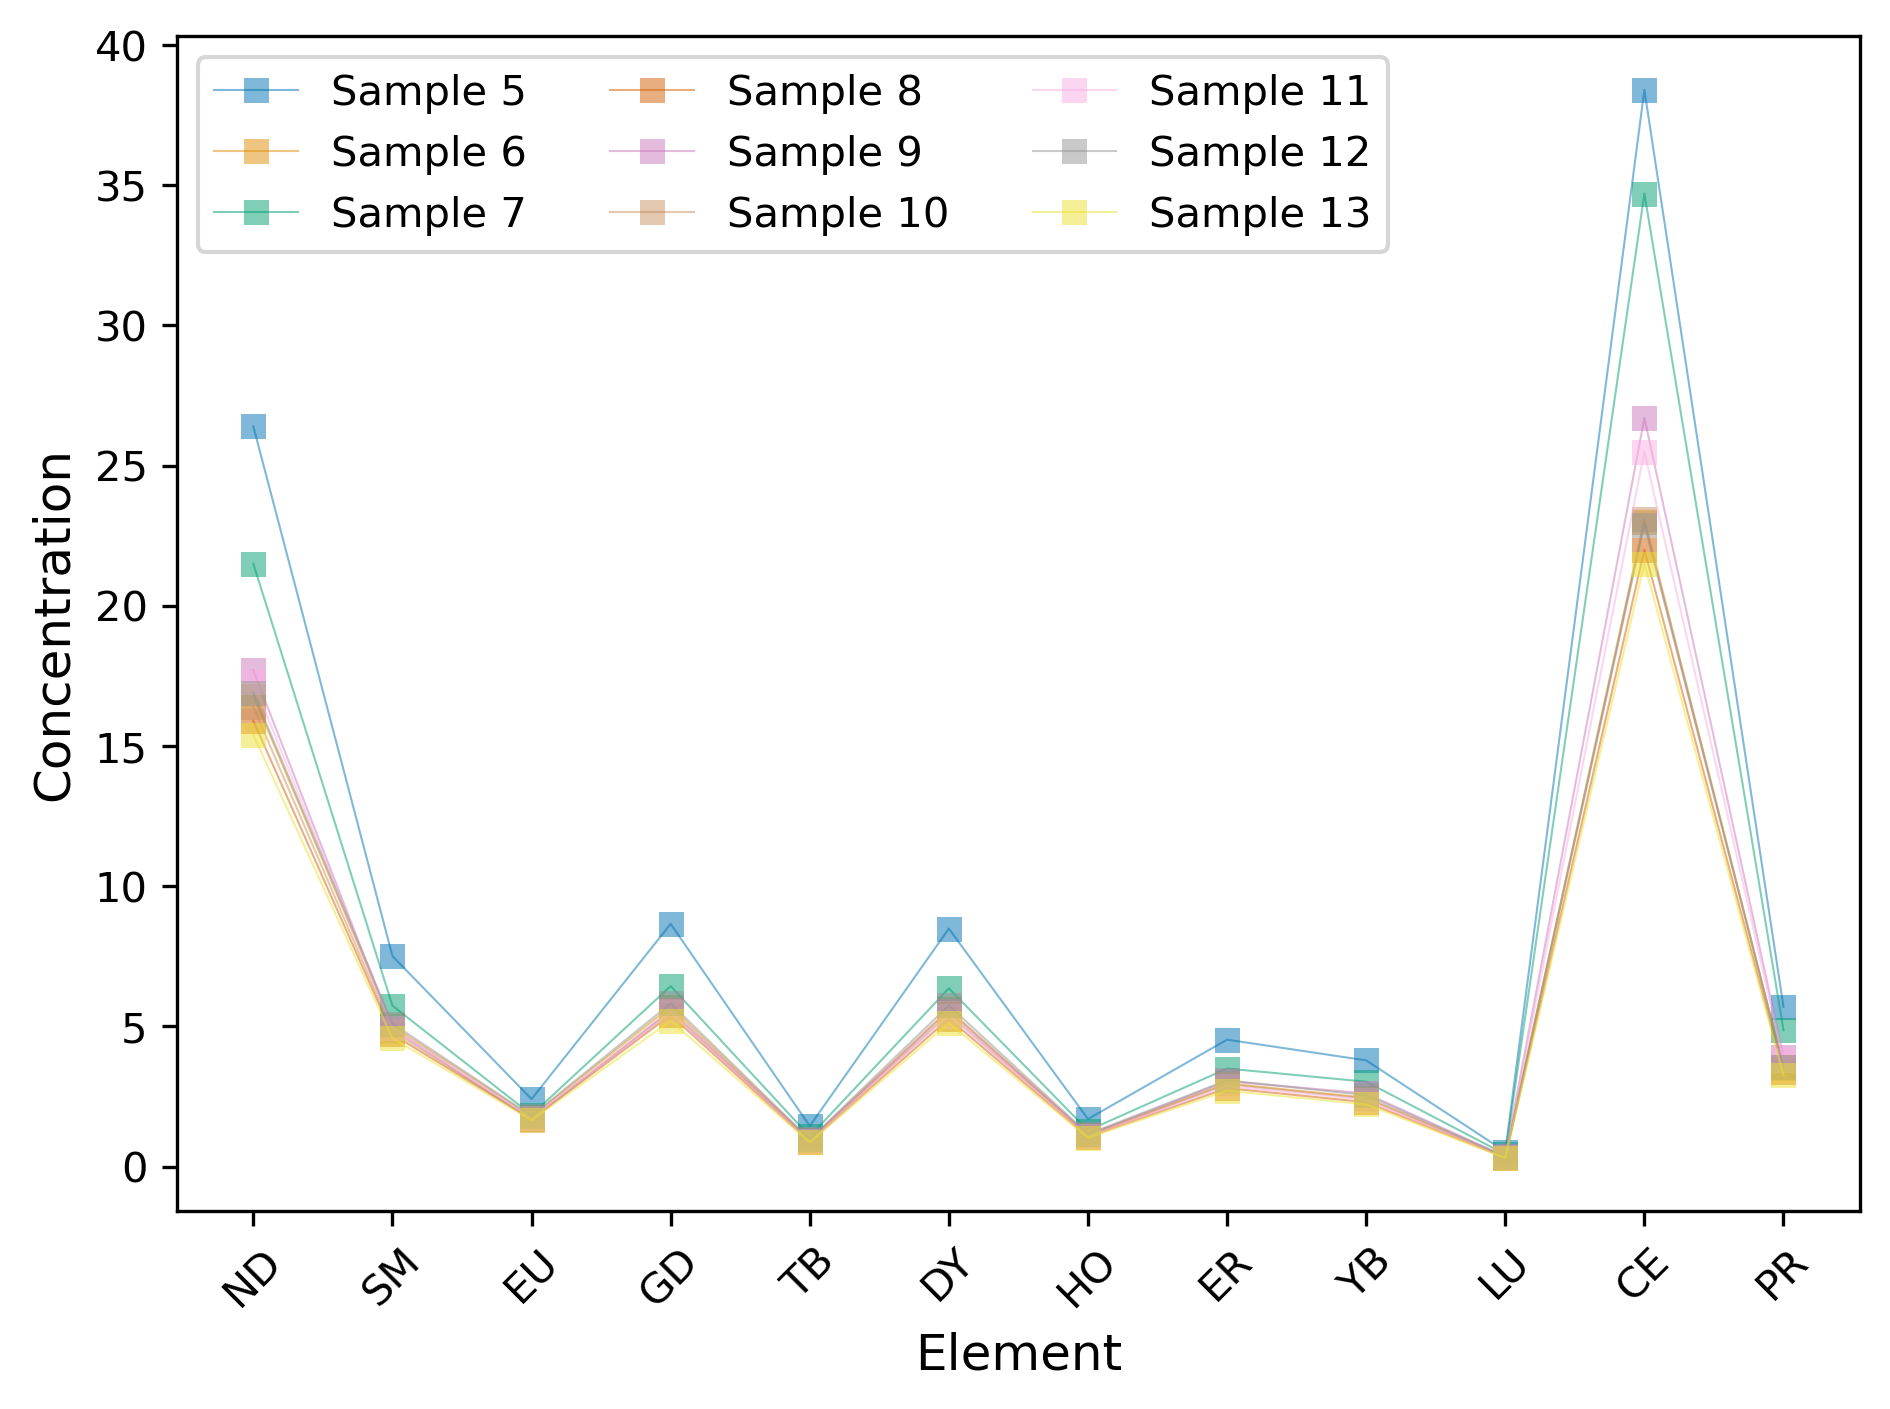

In [343]:
# time to plot! For each of the samples (rows), we'll plot the amount of each element
# let's make a list of the elements we want to plot first:
elements = ["ND", "SM", "EU", "GD", "TB", "DY", "HO", "ER", "YB", "LU", "CE", "PR"]

plt.figure(
    dpi=300
)  # figure making outside the loop, so that all elements and samples get plotted on the same figure
# let's make a for loop to plot each of the samples (rows)
for index, row in deccan_data.iterrows():
    # collect element values for this sample
    element_values = [row[element] for element in elements]
    plt.plot(
        elements,
        element_values,
        marker="s",
        alpha=0.5,
        linewidth=0.5,
        markeredgecolor="none",
        label=f"Sample {index}",
    )  # plot all elements for this sample as one line, added transparency (alpha) to see overlapping data

plt.xlabel("Element", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.legend(ncols=3)  # breaking down my legend into three columns so it looks cleaner
plt.xticks(rotation=45)  # rotate x labels so they don't overlap/look nicer
plt.tight_layout()
plt.show()

## Age distributions


In [344]:
# U-Pb Isotopic Data and Ages of Zircon and Titanite from Rocks from the Western Alaska Range, Northern Aleutian Range, Taylor Mountains, and Tikchik Mountains Regions, Alaska
# load data from csv file

AK_geochron = pd.read_csv(
    "data_for_plots/geochronology_detritalZircon_swAlaskaMts_jones.csv"
)

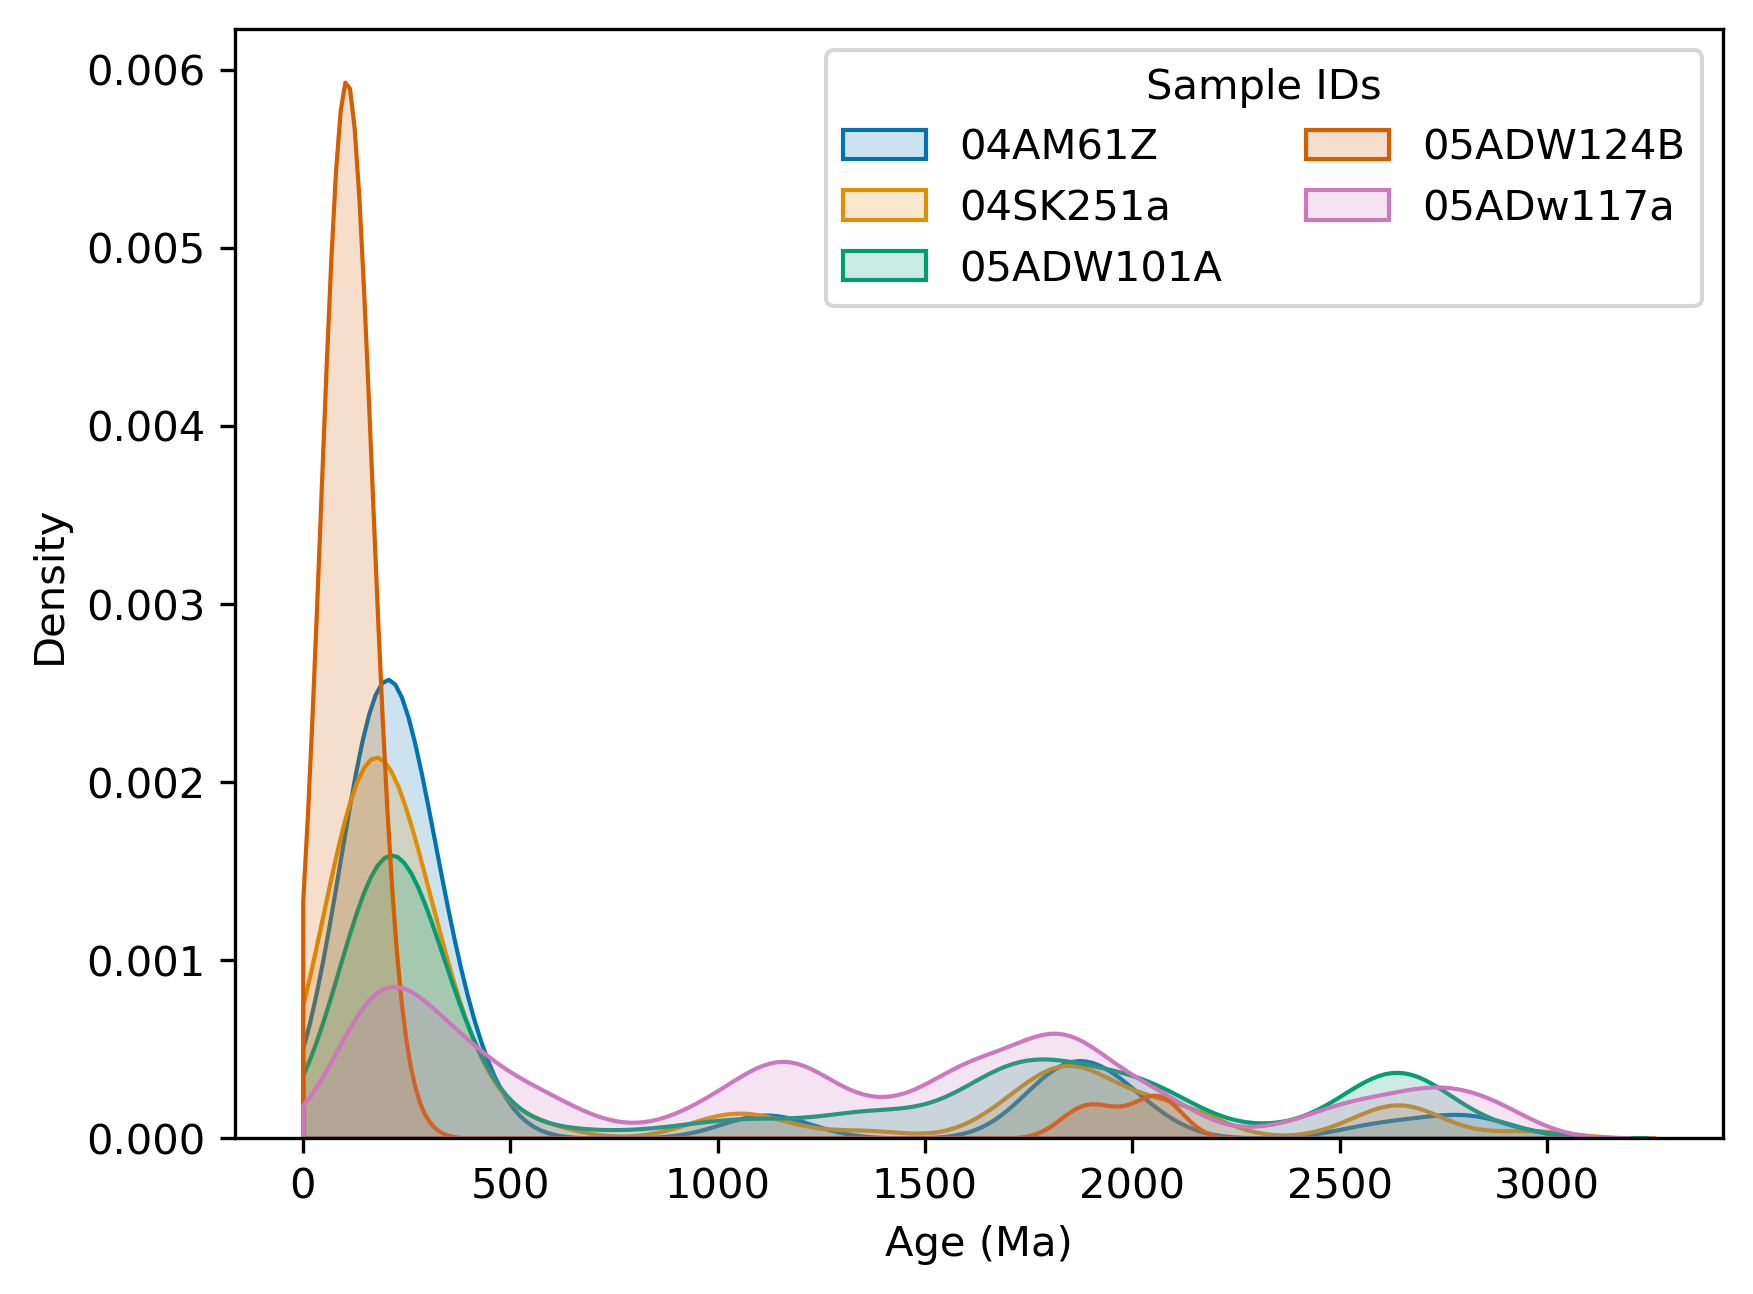

In [345]:
# several rows are related to the same sample, so let's group them by sample name and plot the pdf of ages per sample
plt.figure(dpi=300)
sns.set_palette(
    "colorblind"
)  # let's change the default color palette to a colorblind friendly one!
# let's plot only the first 5 samples (lots of samples here, plot gets crowded...)
unique_samples = AK_geochron["Sample"].unique()[:5]  # get first 5 unique sample names
AK_geochron_subset = AK_geochron[
    AK_geochron["Sample"].isin(unique_samples)
]  # filter for those samples
for sample_name, group_data in AK_geochron_subset.groupby(
    "Sample"
):  # group by sample name, unpacking the tuple (name, dataframe)
    sns.kdeplot(
        group_data["Preferred_Age"],
        alpha=0.2,
        fill=True,
        label=sample_name,
        clip=(0, None),
        bw_adjust=0.3,
    )  # plot the density distribution of the ages, truncate at 0, bw_adjust controls smoothness (lower = less smooth)
plt.xlabel("Age (Ma)")
plt.ylabel("Density")
plt.legend(ncols=2, title="Sample IDs")  # added title to legend this time!
plt.show()

## Time series
Plotting the evolution of a variable over time

In [346]:
# let's plot the number of earthquakes over time during an earthquake sequence! We will also making subplots (more than one plot in the same figure!)
eq_catalog = pd.read_csv("data_for_plots/Ridgecrest_catalog.csv")
eq_catalog["time"] = pd.to_datetime(
    eq_catalog["time"]
)  # convert time column to datetime format
eq_catalog = eq_catalog.sort_values(
    "time"
)  # sort by time in ascending order for cumulative count
eq_catalog.head()  # visualize the first few rows of the data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6064,2019-01-23 14:36:47.390000+00:00,36.085833,-117.617167,1.63,2.83,ml,41.0,34.0,0.107500,0.15,...,2019-01-23T17:51:04.080Z,"30km E of Coso Junction, CA",earthquake,0.14,0.24,0.163,25.0,reviewed,ci,ci
6063,2019-01-24 07:05:49.340000+00:00,36.027000,-117.766333,1.40,2.23,ml,30.0,50.0,0.001987,0.13,...,2019-01-25T02:04:00.783Z,"16km NE of Little Lake, CA",earthquake,0.13,0.17,0.179,49.0,reviewed,ci,ci
6062,2019-02-17 01:51:17.320000+00:00,36.038833,-117.806500,1.37,2.20,ml,30.0,49.0,0.036090,0.15,...,2019-02-19T19:17:01.370Z,"13km E of Coso Junction, CA",earthquake,0.15,0.20,0.132,49.0,reviewed,ci,ci
6061,2019-02-20 04:10:38.440000+00:00,36.108833,-117.903833,2.58,2.17,ml,32.0,59.0,0.040600,0.16,...,2019-02-21T02:05:10.515Z,"8km NNE of Coso Junction, CA",earthquake,0.26,0.37,0.213,25.0,reviewed,ci,ci
6060,2019-02-21 00:16:22.720000+00:00,36.021167,-117.774667,2.14,2.40,ml,25.0,43.0,0.008627,0.16,...,2019-02-21T03:12:32.456Z,"15km NE of Little Lake, CA",earthquake,0.17,0.22,0.159,87.0,reviewed,ci,ci


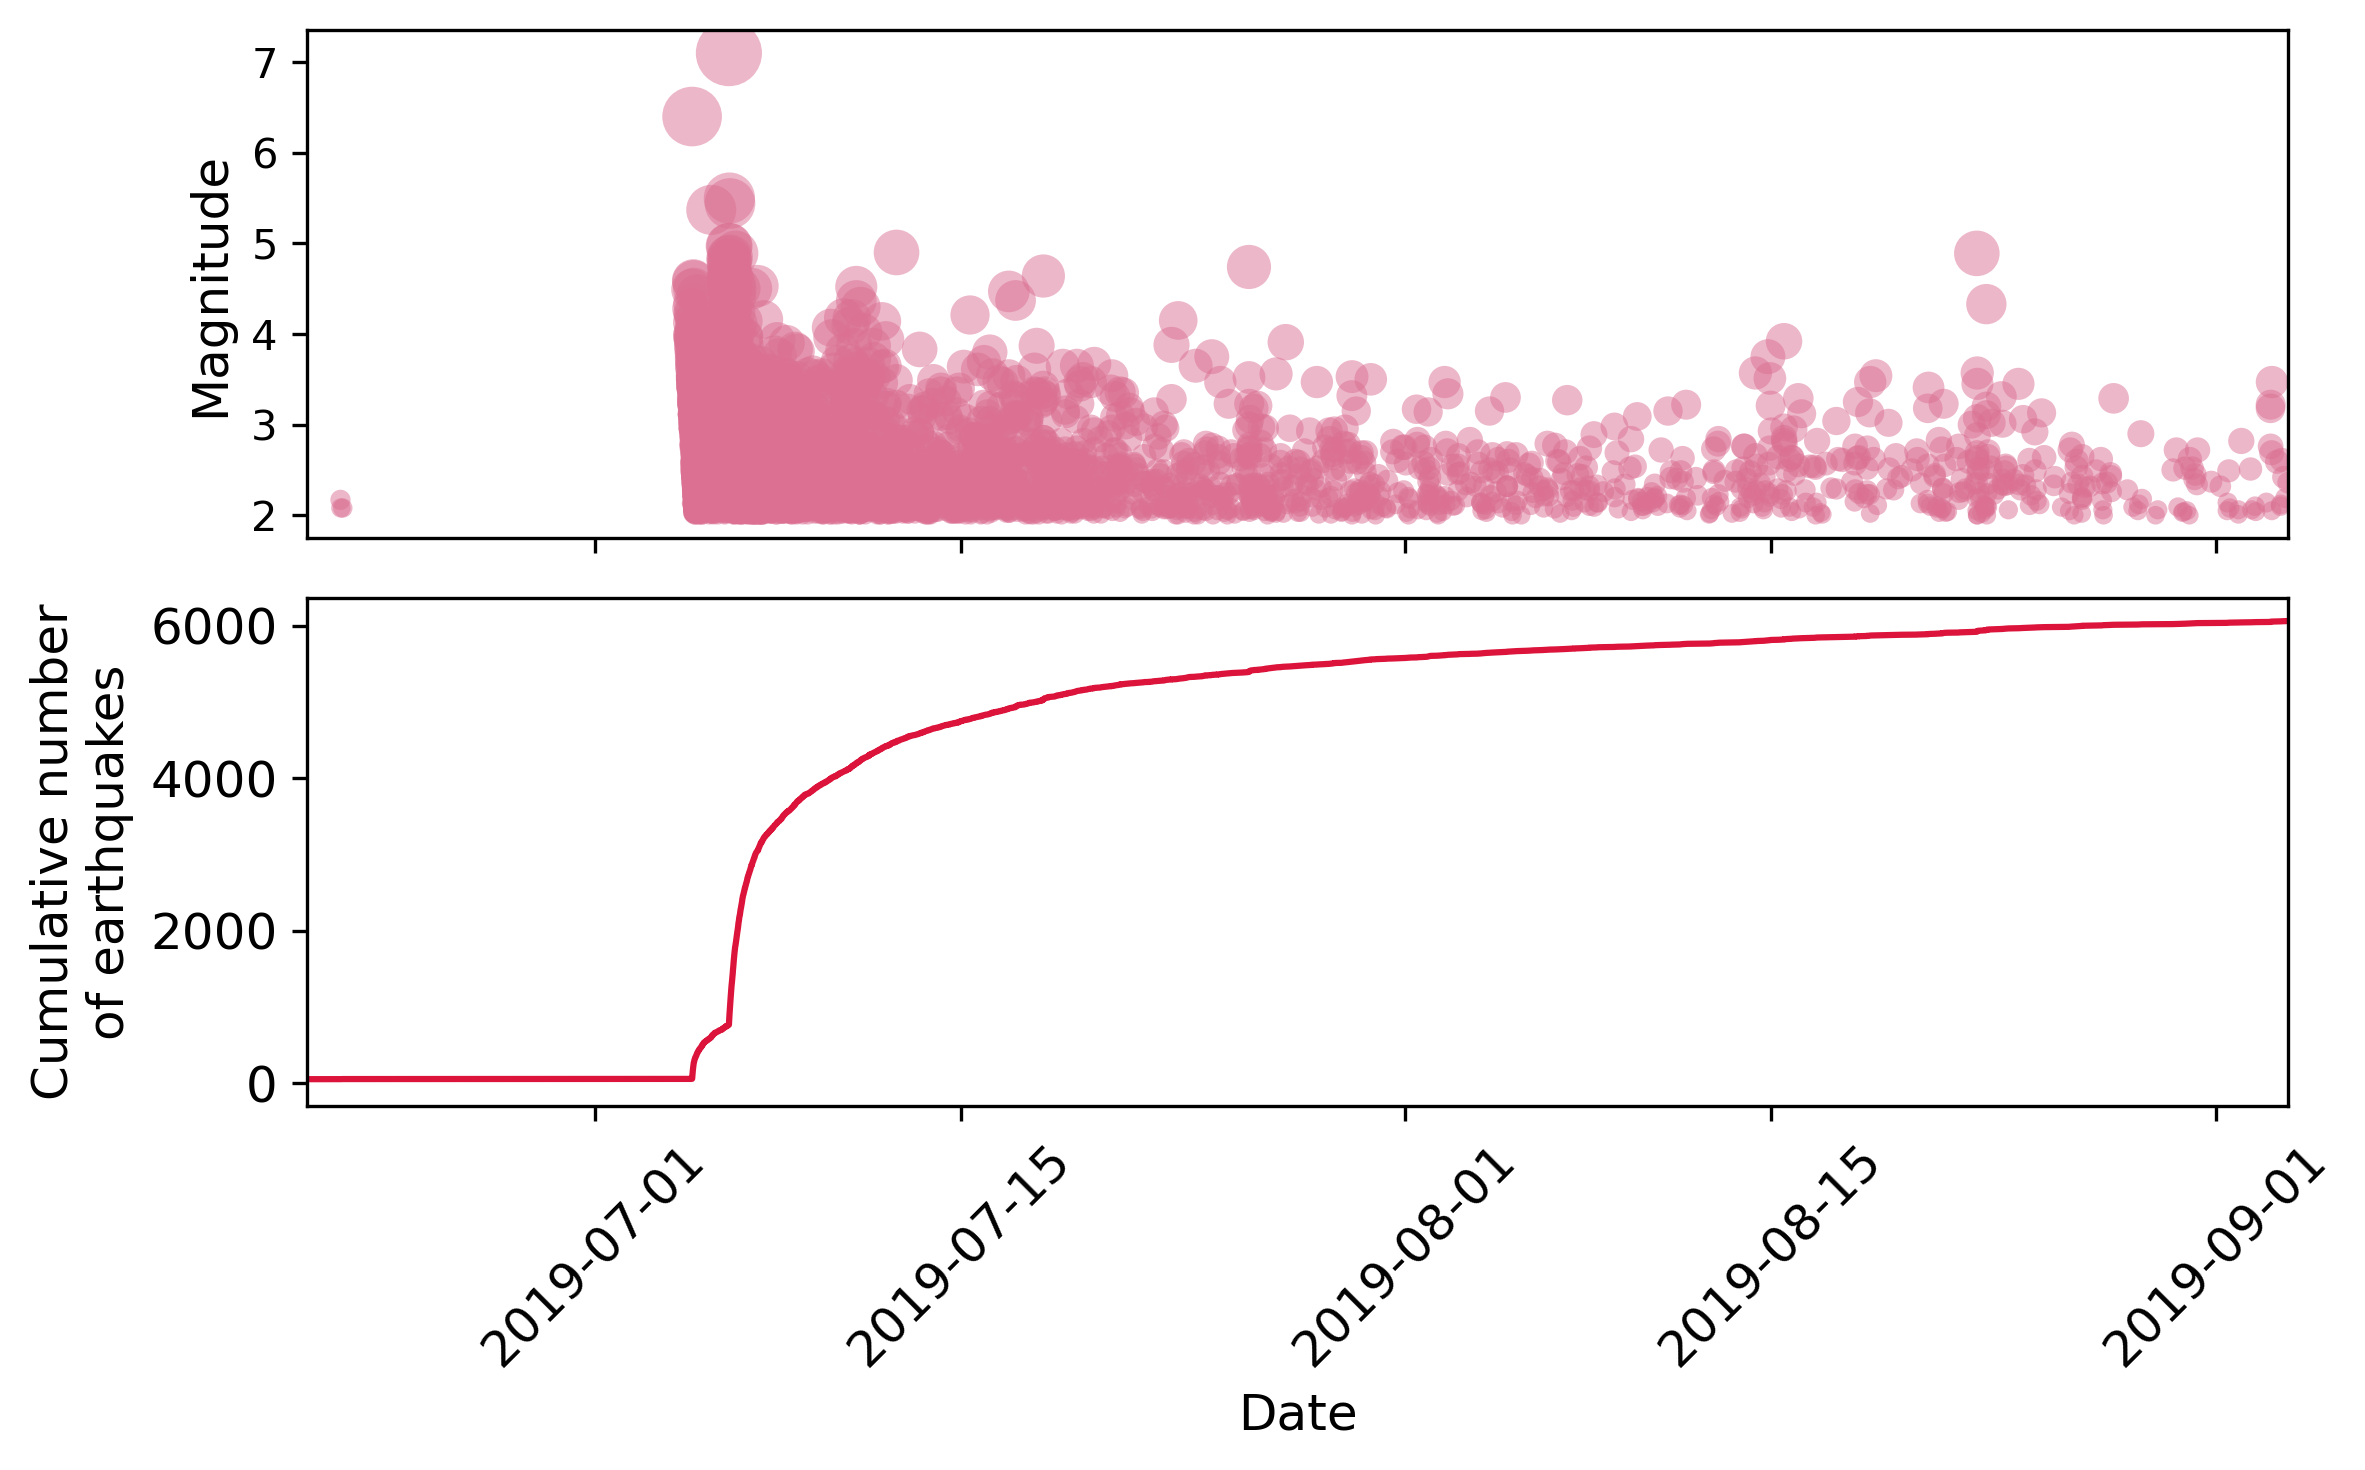

In [347]:
# let's plot the magnitude of earthquakes vs date
# two subplots, top and bottom
fig, (ax1, ax2) = plt.subplots(
    2, 1, sharex=True, figsize=(8, 5), dpi=300
)  # share x axis between subplots
# top subplot: earthquake magnitude versus time
marker_size = (eq_catalog["mag"] ** 2) * 5  # make marker size proportional to magnitude
ax1.scatter(
    eq_catalog["time"],
    eq_catalog["mag"],
    s=marker_size,
    alpha=0.5,
    c="palevioletred",
    edgecolor="none",
)  # plot the magnitude of earthquakes vs date, added transparency (alpha) to see overlapping data

ax1.set_ylabel("Magnitude", fontsize=12)
ax1.set_xlim(
    pd.Timestamp("2019-06-20"), eq_catalog["time"].iloc[-1]
)  # change x limits to June 25 to end of sequence to focus on the timing of aftershocks and omit the long, boring period without much happening before the big earthquakes

# bottom subplot: cumulative number of earthquakes versus time
# calculate cumulative number of earthquakes (count each earthquake as 1)
eq_catalog["cumulative_count"] = range(
    1, len(eq_catalog) + 1
)  # each row is one earthquake, so cumulative count is just 1, 2, 3, 4, ... N
ax2.plot(
    eq_catalog["time"], eq_catalog["cumulative_count"], c="crimson", linewidth=1.5
)  # plot the cumulative number of earthquakes vs time
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel(
    "Cumulative number\nof earthquakes", fontsize=12
)  # two lines in the y label to make it look nicer
ax2.tick_params(axis="x", labelrotation=45)
ax2.tick_params(axis="both", which="major", labelsize=12)
plt.tight_layout()
plt.show()

### References

- USGS Qfaults shapefiles 
1. Hecker, S., 1993, Quaternary tectonics of Utah with emphasis on earthquake-hazard characterization: Utah Geological Survey Bulletin 127, 157 p., 6 pls., scale 1:500,000.
Website link to shapefile: 
https://www.usgs.gov/programs/earthquake-hazards/faults

- Climate data  
Includes Milankovitch cycle orbital data, ice core temperature records,...
Website link to all data downloads:
http://www.climatedata.info/forcing/data-downloads/

- Earthquake catalogs
Website link to USGS catalog download site:
https://earthquake.usgs.gov/earthquakes/map/

- Whole rock rare earth elements of Deccan trap samples 
The data were downloaded from the PetDB Database (www.earthchem.org/petdb) on 2, Febryart 2026.
Website link to MANY INCREDIBLE geochemical/petrological datasets:
https://earthchem.org/petdb

- Sediment grain size distribution from the Elwha River (WA)
Website link to sediment (and other) data from the Elwha River:
https://www.sciencebase.gov/catalog/item/64077140d34e76f5f75e388f

- Detrital zircon ages from Alaska
Website link: https://www.sciencebase.gov/catalog/item/5f163a1282cef313ed81a191
